### Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix

### Reading the data

In [5]:
df = pd.read_csv('DataSet_HAR.csv')

In [6]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Train and Test datasets

In [7]:
# import random
# random_indx = random.sample(range(1, 31), 30)
# 0.8*len(random_indx)

In [8]:
# train_ppl = random_indx[0:24]
train_ppl = [19, 29, 16, 10, 30, 7, 24, 27, 21, 12, 28, 18, 25, 3, 1, 11, 6, 23, 22, 20, 13, 15, 14, 17]

In [9]:
# test_ppl = random_indx[24:]
test_ppl = [8, 9, 2, 26, 5, 4]

In [10]:
df_train = df[df['subject'].isin(train_ppl)]

In [11]:
df_test = df[df['subject'].isin(test_ppl)]

### Dividing datasets to x and y

In [12]:
df_train = df_train.reset_index()
df_train= df_train.drop(['index', 'subject'], axis=1)
df_test = df_test.reset_index()
df_test= df_test.drop(['index', 'subject'], axis=1)

In [13]:
df_test_y = df_test[['Activity']]
df_test = df_test.drop(['Activity'], axis=1)

In [14]:
df_train_y = df_train[['Activity']]
df_train = df_train.drop(['Activity'], axis=1)

### Convert categorical data of Activity attribute to numerical

In [15]:
df_train_y['Activity'] = pd.Categorical(df_train_y['Activity'])
df_train_y['Activity'] = df_train_y.Activity.cat.codes
df_test_y['Activity'] = pd.Categorical(df_test_y['Activity'])
df_test_y['Activity'] = df_test_y.Activity.cat.codes

### Convert dataframes to numpy array

In [16]:
y_train = df_train_y.values
y_train.shape

(8417, 1)

In [17]:
y_test = df_test_y.values

In [18]:
X_train = df_train.values
X_test = df_test.values

### SVM model

In [19]:
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf']}]

In [20]:
grid = GridSearchCV(svm.SVC(gamma='auto'), param_grid, cv=5)

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print('Best score for training data:', grid.best_score_,"\n") 
print('Best C:',grid.best_estimator_.C,"\n") 
print('Best kernel:',grid.best_estimator_.kernel,"\n")

Best score for training data: 0.9523583224426755 

Best C: 100 

Best kernel: rbf 



In [23]:
final_model = grid.best_estimator_
Y_pred = final_model.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, Y_pred)
cm

array([[334,   0,   0,   0,   0,   0],
       [  0, 300,  12,   0,   0,   2],
       [  0,  55, 284,   0,   0,   0],
       [  0,   0,   0, 330,   0,   4],
       [  0,   0,   0,  10, 259,   0],
       [  0,   0,   0,   5,  11, 276]])

In [25]:
accuracy_score(y_test, Y_pred)

0.9473963868225292

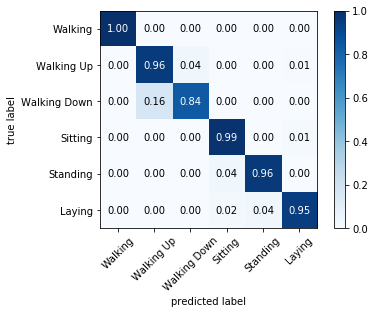

In [26]:
labels = ["Walking", "Walking Up", "Walking Down", "Sitting", "Standing", "Laying"]
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, show_absolute=False, show_normed=True, class_names=labels)
plt.show()